In [3]:
from os import chdir
chdir('/Users/lananhnguyen/Desktop/thesis/thesis_code')
import main.packages.unchain_chain as chain
import main.packages.mine_generic as mine_g
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re
from dieboldmariano import dm_test


In [5]:
date_range = pd.date_range(start=mine_g.train_test_split_date + pd.DateOffset(months=1), end=mine_g.max_X_date, freq='M')


In [7]:
cat_short = 'food'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]


rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, 5), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])
rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

prc_food_h_1
(-2.672201632171722, 0.009068961160103962)
xgb_food_h_1
(2.9529759227421226, 0.004092377873169372)
ridge_food_h_1
(-2.907606023229412, 0.004670445347421725)
lasso_food_h_1
(2.239902340872973, 0.027770514003182277)
prc_food_h_2
(-1.7239689222087, 0.08843636899010199)
xgb_food_h_2
(1.7344280155628728, 0.08655458887067825)
ridge_food_h_2
(-1.8286594788031194, 0.07104265251032901)
lasso_food_h_2
(-1.2992786810315102, 0.1974458169033113)
prc_food_h_3
(-1.3049718551369687, 0.19550883254370333)
xgb_food_h_3
(1.1874277467709904, 0.23844611790189885)
ridge_food_h_3
(-1.4578821389551597, 0.1486465514960984)
lasso_food_h_3
(-1.2924918785761201, 0.19977352619418143)
prc_food_h_1
(-2.672201632171722, 0.009068961160103962)
xgb_food_h_1
(2.9529759227421226, 0.004092377873169372)
ridge_food_h_1
(-2.907606023229412, 0.004670445347421725)
lasso_food_h_1
(2.239902340872973, 0.027770514003182277)
prc_food_h_2
(-1.7239689222087, 0.08843636899010199)
xgb_food_h_2
(1.7344280155628728, 0.08655458

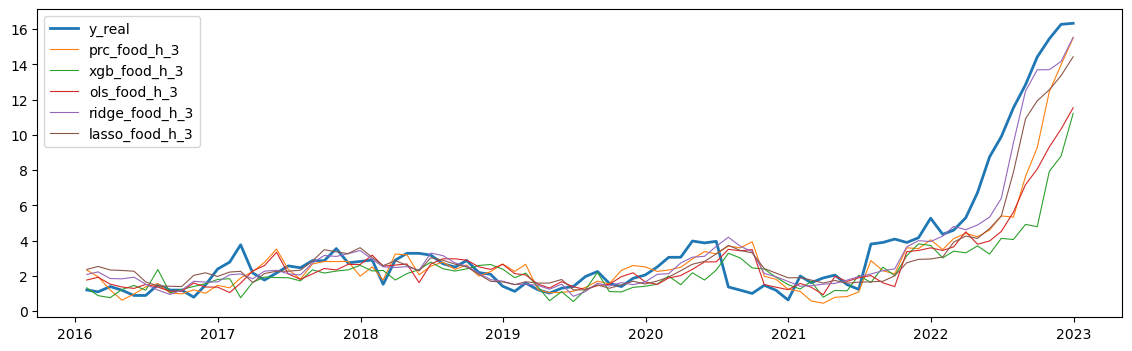

In [18]:
plt.figure(figsize=(14, 4))
plt.plot(yoy_real_test, label = "y_real", linewidth = 2)
for col in forecast_df_h.columns:
    plt.plot(forecast_df_h[col], label = col, linewidth = 0.8)
plt.legend()
plt.show()


In [14]:

def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]


rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, 5), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])



In [8]:
rmse_comparative = [round(rmse[col]/rmse['ols_food'], 2) for col in rmse.columns]
rmse_comparative

[h_1    0.80
 h_2    0.78
 h_3    0.80
 dtype: float64,
 h_1    2.09
 h_2    1.67
 h_3    1.22
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ols_food, dtype: float64,
 h_1    0.79
 h_2    0.62
 h_3    0.52
 dtype: float64,
 h_1    1.13
 h_2    0.81
 h_3    0.68
 dtype: float64]

In [9]:
rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

---------

In [21]:
cat_short = 'energy'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ols" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ols_{cat_short}_h_{h}'], h = h, harvey_correction=True))



    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]
rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, 5), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])


prc_energy_h_1
(0.5277933465754704, 0.5990509615207178)
xgb_energy_h_1
(2.743547298017864, 0.007445935961637639)
ridge_energy_h_1
(1.445949231952214, 0.1519570404436703)
lasso_energy_h_1
(1.309731091654549, 0.19390051428979382)
prc_energy_h_2
(0.08276246554624206, 0.9342396863856061)
xgb_energy_h_2
(1.5281893300567042, 0.13026772086420035)
ridge_energy_h_2
(0.4584539935189064, 0.6478244776936253)
lasso_energy_h_2
(0.2984842851216414, 0.7660795566327312)
prc_energy_h_3
(-0.38053519237966676, 0.7045203428127709)
xgb_energy_h_3
(1.0815356141789796, 0.2825912890807166)
ridge_energy_h_3
(-0.1800673985036792, 0.8575385660203863)
lasso_energy_h_3
(-0.40665586027357764, 0.6853074694760665)


In [ ]:

rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

In [24]:
rmse

,prc_energy,xgb_energy,ols_energy,ridge_energy,lasso_energy
h_1,3.488918,4.766152,3.331470,3.835047,3.712284
h_2,4.993943,5.722806,4.944986,5.372019,5.168972
h_3,6.039753,6.657155,6.269531,6.069338,5.913817


In [23]:
rmse_comparative = [round(rmse[col]/rmse[f'ols_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    1.05
 h_2    1.01
 h_3    0.96
 dtype: float64,
 h_1    1.43
 h_2    1.16
 h_3    1.06
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ols_energy, dtype: float64,
 h_1    1.15
 h_2    1.09
 h_3    0.97
 dtype: float64,
 h_1    1.11
 h_2    1.05
 h_3    0.94
 dtype: float64]

--------

In [26]:
cat_short = 'neig'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ols" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ols_{cat_short}_h_{h}'], h = h, harvey_correction=True))


    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]
rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, 5), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])


prc_neig_h_1
(-1.779940308587169, 0.07874566473970629)
xgb_neig_h_1
(4.622625602360849, 1.3758186733038489e-05)
ridge_neig_h_1
(-0.4812488017529946, 0.6316060054532434)
lasso_neig_h_1
(2.8698384299016086, 0.0052080831727519695)
prc_neig_h_2
(0.06632953271918612, 0.9472749834413732)
xgb_neig_h_2
(2.597525861959727, 0.011106440167819226)
ridge_neig_h_2
(-2.734010552451166, 0.007646335942634877)
lasso_neig_h_2
(0.5469917230570852, 0.5858521064168224)
prc_neig_h_3
(-0.17554298393645332, 0.8610805580242835)
xgb_neig_h_3
(1.6497162007512258, 0.10278074231593615)
ridge_neig_h_3
(-2.2602177875609586, 0.02642623967626257)
lasso_neig_h_3
(-1.1141731513825697, 0.268420920833791)


In [27]:
rmse

,prc_neig,xgb_neig,ols_neig,ridge_neig,lasso_neig
h_1,0.566685,1.225697,0.598325,0.582295,0.873531
h_2,0.878430,1.451915,0.874077,0.652798,0.929629
h_3,1.051903,1.257452,1.071062,0.720519,0.950498


In [28]:
rmse_comparative = [round(rmse[col]/rmse[f'ols_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    0.95
 h_2    1.00
 h_3    0.98
 dtype: float64,
 h_1    2.05
 h_2    1.66
 h_3    1.17
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ols_neig, dtype: float64,
 h_1    0.97
 h_2    0.75
 h_3    0.67
 dtype: float64,
 h_1    1.46
 h_2    1.06
 h_3    0.89
 dtype: float64]

In [ ]:

rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

-----

In [29]:
cat_short = 'services'
forecast_df_cat = pd.read_csv(f"data/forecast_results/{cat_short}_forecast.csv")

forecast_df_cat.set_index(date_range, inplace=True)

return_cols = [col for col in forecast_df_cat.columns if cat_short in col]
forecast_df_cat = forecast_df_cat.loc[:, return_cols]

yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]

rmse = []

for h in [1, 2, 3]:
    h_cols = []

    for col in forecast_df_cat.columns:
        if col.endswith(str(h)):
            h_cols.append(col)
    forecast_df_h = forecast_df_cat[h_cols]
    
    for col in [ col for col in forecast_df_h.columns if "ols" not in col]:
        print(col)
        print(dm_test(yoy_real_test.iloc[:, 0], forecast_df_h[col], forecast_df_h.loc[:, f'ols_{cat_short}_h_{h}'], h = h, harvey_correction=True))

    

    for col in forecast_df_h.columns:
        rmse_here = np.sqrt(mean_squared_error(forecast_df_h[col], yoy_real_test))
        rmse.append(rmse_here)


def get_first_part(col_name, separator='_h'):
    return col_name.split(separator)[0]

new_col_names = [get_first_part(col) for col in forecast_df_h.columns]
rmse = pd.DataFrame(rmse)
rmse = pd.DataFrame(rmse.values.reshape(3, 5), columns=new_col_names, index=[f'h_{h}' for h in [1, 2, 3]])


prc_services_h_1
(-1.4595616854066018, 0.14818513851979032)
xgb_services_h_1
(0.9552167061641583, 0.3422419899123469)
ridge_services_h_1
(1.5671186847400926, 0.12089178131385703)
lasso_services_h_1
(0.7747508647201439, 0.4406884417383623)
prc_services_h_2
(-0.8601773269321566, 0.3921691446549126)
xgb_services_h_2
(-0.04405258270204089, 0.9649683000724237)
ridge_services_h_2
(-0.10310111269388794, 0.9181314244250032)
lasso_services_h_2
(-0.38885827323009603, 0.6983767724620524)
prc_services_h_3
(-1.199563187754132, 0.23372215425641418)
xgb_services_h_3
(-1.943779716097353, 0.05531054408106498)
ridge_services_h_3
(-0.8643437441100511, 0.38989022257862926)
lasso_services_h_3
(-1.0874832394071672, 0.27997121957882176)


In [30]:
rmse_comparative = [round(rmse[col]/rmse[f'ols_{cat_short}'], 2) for col in rmse.columns]
rmse_comparative

[h_1    0.92
 h_2    0.92
 h_3    0.88
 dtype: float64,
 h_1    1.06
 h_2    1.00
 h_3    0.84
 dtype: float64,
 h_1    1.0
 h_2    1.0
 h_3    1.0
 Name: ols_services, dtype: float64,
 h_1    1.09
 h_2    0.99
 h_3    0.88
 dtype: float64,
 h_1    1.04
 h_2    0.97
 h_3    0.86
 dtype: float64]

In [ ]:

rmse.to_csv(f"data/report_rmse/{cat_short}.csv")

-----